<a href="https://colab.research.google.com/github/Kostratana/NASA_project/blob/main/%22NASA_project_3%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

9-This code fetches exoplanet candidate data from NASA, normalizes the features, creates binary labels based on a threshold, trains a Random Forest Classifier to predict the labels, evaluates the model with a classification report


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00       229

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Figure size 1200x600 with 0 Axes>

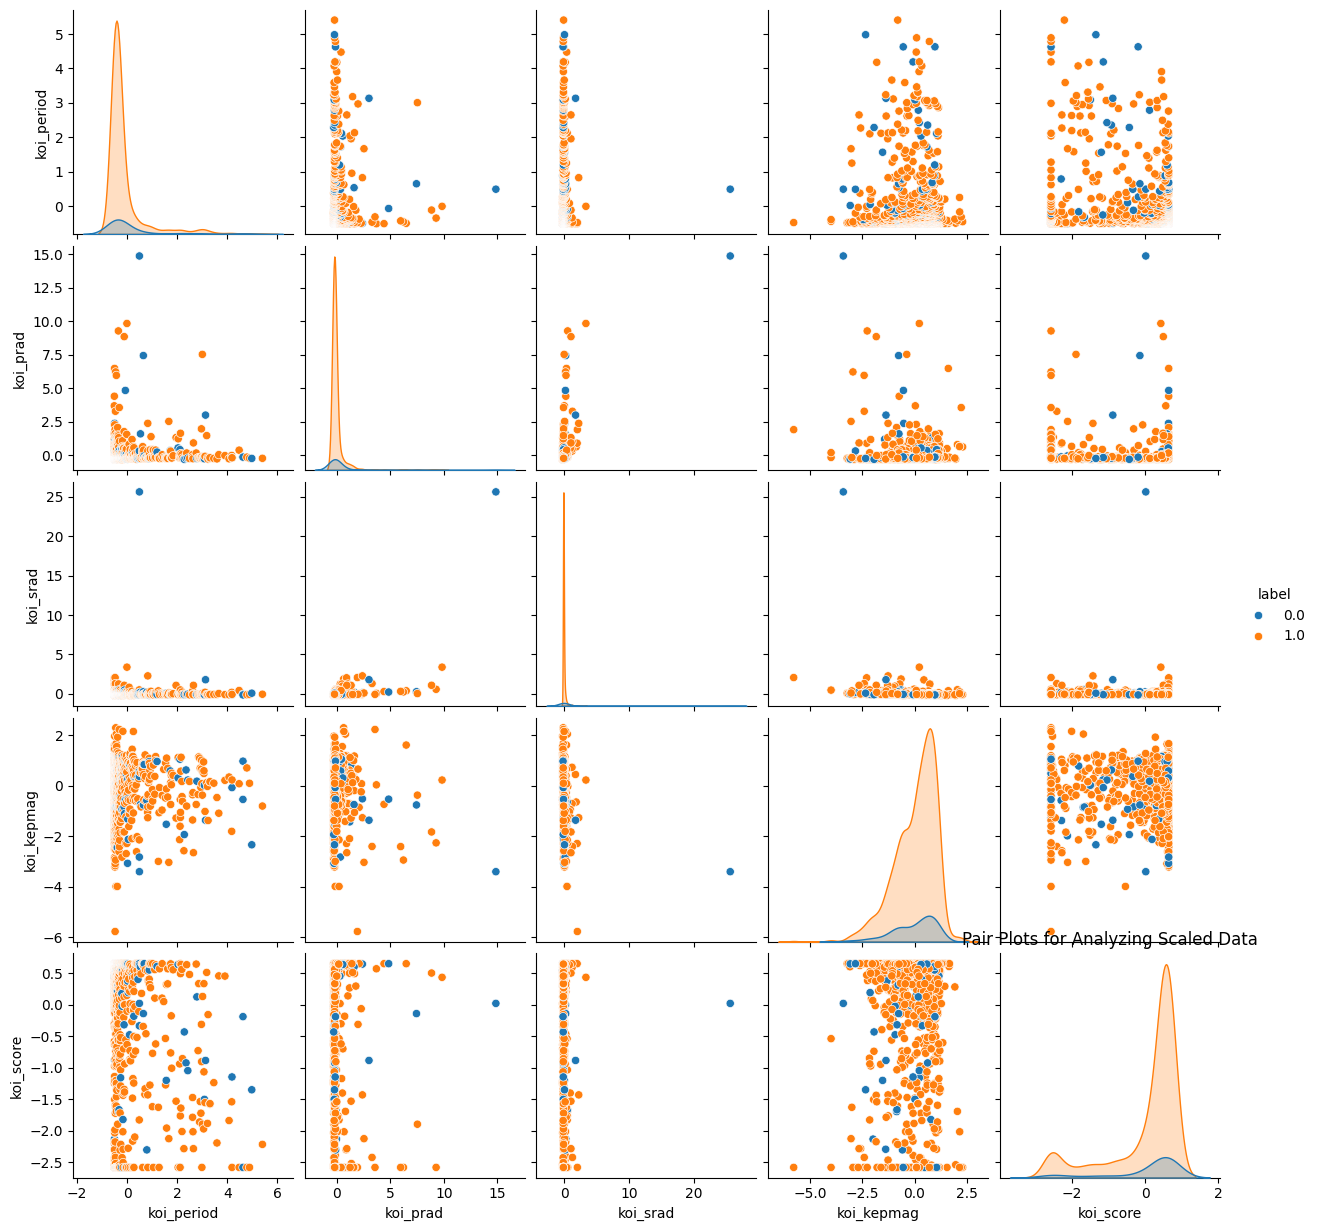

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import requests
from io import StringIO

# Request data about exoplanet candidates
base_url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?"
table = "cumulative"
where_clause = "koi_disposition like 'CANDIDATE'"
order_by = "koi_period"
format_type = "csv"

query_url = f"{base_url}table={table}&where={where_clause}&order={order_by}&format={format_type}"
response = requests.get(query_url)

if response.status_code == 200:
    data = pd.read_csv(StringIO(response.text))

    # Clean the data
    data = data[['koi_period', 'koi_prad', 'koi_srad', 'koi_kepmag', 'koi_score']].dropna()

    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Create labels based on a threshold (for example, koi_score > 0.5)
    labels = (data['koi_score'] > 0.5).astype(int)  # Binary classification

    # Split data into features and labels
    X = scaled_data
    y = labels

    # Split into training and testing sets while maintaining class balance
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Oversample using SMOTE
    smote = SMOTE(random_state=42, k_neighbors=1)  # Reduce the number of neighbors to 1
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    # Train a Random Forest Classifier
    model = RandomForestClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)

    # Predictions
    y_pred = model.predict(X_test)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualize the pair plots of the scaled data
    scaled_df = pd.DataFrame(scaled_data, columns=['koi_period', 'koi_prad', 'koi_srad', 'koi_kepmag', 'koi_score'])
    scaled_df['label'] = labels  # Add labels to the DataFrame for visualization
    plt.figure(figsize=(12, 6))
    sns.pairplot(scaled_df, hue='label')
    plt.title("Pair Plots for Analyzing Scaled Data")
    plt.show()
else:
    print(f"Error fetching data: {response.status_code}")



10-This code fetches exoplanet candidate data from NASA, normalizes the relevant features, creates binary labels based on a threshold, splits the data into training and testing sets, and outputs the sizes of these sets

In [ ]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Request data about exoplanet candidates
base_url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?"
table = "cumulative"
where_clause = "koi_disposition like 'CANDIDATE'"
order_by = "koi_period"
format_type = "csv"

query_url = f"{base_url}table={table}&where={where_clause}&order={order_by}&format={format_type}"
response = requests.get(query_url)

if response.status_code == 200:
    data = pd.read_csv(StringIO(response.text))

    # Clean the data and select relevant columns
    data = data[['koi_period', 'koi_prad', 'koi_srad', 'koi_kepmag', 'koi_score']].dropna()

    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data)

    # Create labels based on a threshold (for example, koi_score > 0.5)
    labels = (data['koi_score'] > 0.5).astype(int)  # Binary classification

    # Split data into features and labels
    X = scaled_data
    y = labels

    # Split into training and testing sets while maintaining class balance
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Output the sizes of the datasets
    print(f"Training set size: {X_train.shape[0]}")
    print(f"Testing set size: {X_test.shape[0]}")
else:
    print(f"Error fetching data: {response.status_code}")


Training set size: 1100
Testing set size: 275


11-This code creates a Random Forest classifier using example data with binary labels, performs hyperparameter tuning using Grid Search, evaluates the model's performance on a test set, and outputs the best parameters and a classification report

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Example data
data = {
    'factor_1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'factor_2': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'label': ['life possible', 'life possible', 'life possible',
              'life impossible', 'life impossible',
              'life impossible', 'life impossible',
              'life impossible', 'life impossible',
              'life impossible']
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert class labels to numeric format
df['label_numeric'] = df['label'].map({'life possible': 1, 'life impossible': 0})

# Split data into training and testing sets
X = df[['factor_1', 'factor_2']]
y = df['label_numeric']

# Use an 80/20 split for the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create a Random Forest model
rf_model = RandomForestClassifier()

# Define parameters for Grid Search
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up hyperparameter tuning with Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Train the model
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate model performance
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Output classification report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



12-This code fetches candidate exoplanet data from the NASA Exoplanet Archive, processes the data to create a training dataset with random features and labels, trains a Random Forest classifier using Grid Search for hyperparameter tuning, and outputs predictions for candidate planets along with their names

In [ ]:
import requests
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Base URL for NASA Exoplanet Archive API
base_url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?"

# Define request parameters
table = "cumulative"  # Select the table with data
where_clause = "koi_disposition like 'CANDIDATE'"  # Condition to select candidates
order_by = "koi_period"  # Sort by orbital period
format_type = "csv"  # Data format

# Formulate the request URL
query_url = f"{base_url}table={table}&where={where_clause}&order={order_by}&format={format_type}"

# Execute the request
response = requests.get(query_url)

if response.status_code == 200:
    # Read data into DataFrame
    data = pd.read_csv(StringIO(response.text))

    # Output column names for verification
    print("Columns in the dataset:", data.columns.tolist())

    # Use the 'kepoi_name' column for candidate names
    planet_names_column = 'kepoi_name'  # Use 'kepoi_name' instead of 'pl_name'
    if planet_names_column in data.columns:
        planet_names = data[planet_names_column].tolist()
    else:
        print(f"Column '{planet_names_column}' not found in the dataset.")
        planet_names = []

    # Check if there is data for training
    if len(planet_names) == 0:
        print("No candidate planets found. Exiting.")
    else:
        # Example data for training the model
        df = pd.DataFrame({
            'factor_1': np.random.randint(1, 10, size=len(planet_names)),
            'factor_2': np.random.randint(5, 15, size=len(planet_names)),
            'label': np.random.choice(['life possible', 'life impossible'], size=len(planet_names))
        })

        # Convert class labels to numeric format
        df['label_numeric'] = df['label'].map({'life possible': 1, 'life impossible': 0})

        # Check that the DataFrame is not empty
        if df.empty:
            print("DataFrame is empty. Exiting.")
        else:
            # Split data into training and testing sets
            X = df[['factor_1', 'factor_2']]
            y = df['label_numeric']

            # Use an 80/20 split for the data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

            # Create a Random Forest model
            rf_model = RandomForestClassifier()

            # Define parameters for Grid Search
            param_grid = {
                'n_estimators': [10, 50, 100],
                'max_depth': [None, 5, 10, 15],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }

            # Set up hyperparameter tuning with Grid Search
            grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                                       cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

            # Train the model
            grid_search.fit(X_train, y_train)

            # Predictions
            predictions = grid_search.best_estimator_.predict(X_test)

            # Convert predictions back to labels in English
            predicted_labels = ['Life Possible' if pred == 1 else 'Life Impossible' for pred in predictions]

            # Output predictions with candidate names
            for i, label in enumerate(predicted_labels):
                if i < len(planet_names):
                    print(f"Candidate Planet: {planet_names[i]}, Prediction: {label}")
else:
    print(f"Error executing request: {response.status_code}")


Columns in the dataset: ['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra_str', 'dec_str', 'koi_kepmag', 'koi_kepmag_err']
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Candidate Planet: K04419.01, Prediction: Life Impossible
Candidate Planet: K07859.01, Predictio

13-This code extracts data about candidate exoplanets from the NASA archive, creates a regression model using a random forest to predict the likelihood of life on the planets, and outputs the predicted values for each candidate.

In [ ]:
import requests
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Base URL for NASA Exoplanet Archive API
base_url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?"

# Define request parameters
table = "cumulative"  # Select the table with data
where_clause = "koi_disposition like 'CANDIDATE'"  # Condition to select candidates
order_by = "koi_period"  # Sort by orbital period
format_type = "csv"  # Data format

# Formulate the request URL
query_url = f"{base_url}table={table}&where={where_clause}&order={order_by}&format={format_type}"

# Execute the request
response = requests.get(query_url)

if response.status_code == 200:
    # Read data into DataFrame
    data = pd.read_csv(StringIO(response.text))

    # Output column names for verification
    print("Columns in the dataset:", data.columns.tolist())

    # Use the 'kepoi_name' column for candidate names
    planet_names_column = 'kepoi_name'  # Use 'kepoi_name' instead of 'pl_name'
    if planet_names_column in data.columns:
        planet_names = data[planet_names_column].tolist()
    else:
        print(f"Column '{planet_names_column}' not found in the dataset.")
        planet_names = []

    # Check if there is data for training
    if len(planet_names) == 0:
        print("No candidate planets found. Exiting.")
    else:
        # Example data for training the model
        df = pd.DataFrame({
            'factor_1': np.random.randint(1, 10, size=len(planet_names)),
            'factor_2': np.random.randint(5, 15, size=len(planet_names)),
            'label_numeric': np.random.rand(len(planet_names))  # Continuous values for regression
        })

        # Check that the DataFrame is not empty
        if df.empty:
            print("DataFrame is empty. Exiting.")
        else:
            # Split data into training and testing sets
            X = df[['factor_1', 'factor_2']]
            y = df['label_numeric']

            # Use an 80/20 split for the data
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Create a Random Forest Regressor model
            rf_model = RandomForestRegressor()

            # Train the model
            rf_model.fit(X_train, y_train)

            # Predictions
            predictions = rf_model.predict(X_test)

            # Output predictions with candidate names
            for i, pred in enumerate(predictions):
                if i < len(planet_names):
                    print(f"Candidate Planet: {planet_names[i]}, Predicted Life Score: {pred:.2f}")
else:
    print(f"Error executing request: {response.status_code}")


Columns in the dataset: ['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2', 'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra_str', 'dec_str', 'koi_kepmag', 'koi_kepmag_err']
Candidate Planet: K04419.01, Predicted Life Score: 0.33
Candidate Planet: K07859.01, Predicted Life Score: 0.48
Candidate Planet: K02879.01, Predicted Life Sc